In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
import time
import matplotlib.animation as animation

Initial parameters of the beads. 
mass is in units of 1. 1 unit is 1 kg
lenght is in units of 1. 1 unit is 1m.
angle in radians
Timestep is deltaT
initial angle velocity phi_1_0

In [49]:
# initialization of single pendulum
length_one = 1
mass_one = 1
angle_phi_one = 0.25*math.pi
x_pos = []
y_pos = []
x_pos = np.array(length_one*math.sin(angle_phi_one))
y_pos = np.array(-length_one*math.cos(angle_phi_one))
gravity = scipy.constants.g
T= 2*math.pi*math.sqrt(length_one/gravity)
number_of_iterations = 1000
deltaT = T/number_of_iterations
x_coordinates=([0,x_pos])
y_coordinates=([0,y_pos])
Velocity_phi_one = 0
t = 0
i = 1


In [50]:
#calculating the angle acceleration
while i <= 3*number_of_iterations:
    acceleration_phi_one = -gravity/length_one*math.sin(angle_phi_one)
    Velocity_phi_one = acceleration_phi_one*deltaT+Velocity_phi_one

    #calculating time
    t= t + deltaT

    #calculating new angle
    angle_phi_one = angle_phi_one + Velocity_phi_one*deltaT + 1/2*acceleration_phi_one*deltaT**2

    #calculate new positions
    x_pos = np.append(x_pos, length_one*math.sin(angle_phi_one))
    y_pos = np.append(y_pos, -length_one*math.cos(angle_phi_one))
    i = i+1
    #x_coordinates=([0,x_pos])
    #y_coordinates=([0,y_pos])

In [4]:
print(x_pos)
print(y_pos)

[ 7.07106781e-01  7.04139709e-01  6.99179742e-01  6.92203499e-01
  6.83178990e-01  6.72067358e-01  6.58825068e-01  6.43406481e-01
  6.25766776e-01  6.05865162e-01  5.83668290e-01  5.59153787e-01
  5.32313786e-01  5.03158352e-01  4.71718647e-01  4.38049707e-01
  4.02232696e-01  3.64376492e-01  3.24618507e-01  2.83124633e-01
  2.40088275e-01  1.95728440e-01  1.50286915e-01  1.04024612e-01
  5.72171863e-02  1.01500972e-02 -3.68867032e-02 -8.36042462e-02
 -1.29719962e-01 -1.74962824e-01 -2.19078022e-01 -2.61830998e-01
 -3.03010706e-01 -3.42432010e-01 -3.79937180e-01 -4.15396474e-01
 -4.48707853e-01 -4.79795904e-01 -5.08610071e-01 -5.35122306e-01
 -5.59324291e-01 -5.81224335e-01 -6.00844109e-01 -6.18215317e-01
 -6.33376421e-01 -6.46369524e-01 -6.57237476e-01 -6.66021284e-01
 -6.72757868e-01 -6.77478210e-01 -6.80205915e-01 -6.80956215e-01
 -6.79735416e-01 -6.76540806e-01 -6.71361004e-01 -6.64176765e-01
 -6.54962208e-01 -6.43686460e-01 -6.30315677e-01 -6.14815412e-01
 -5.97153272e-01 -5.77301

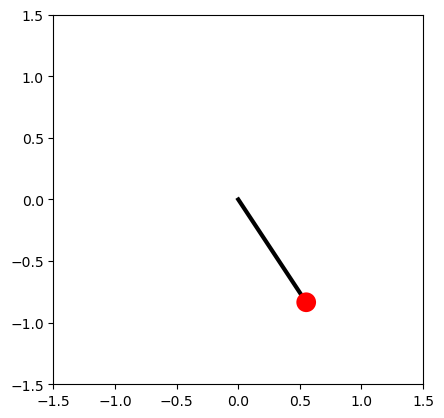

In [52]:
# Initialize the animation plot. Make the aspect ratio equal so it looks right.
fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
# draw a line
line, = ax.plot([0, x_pos[0]], [0, y_pos[0]], lw=3, c='k')
#draw the ball for first position
bob_radius = 0.08
circle = ax.add_patch(plt.Circle([x_pos[0], y_pos[0]], bob_radius,
                      fc='r', zorder=3))
#initialise axis limits
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

#make the animation
def animate(i):
    """Update the animation at frame i."""
    line.set_data([0, x_pos[i]], [0, y_pos[i]])
    circle.set_center((x_pos[i], y_pos[i]))

nframes = 3*number_of_iterations
interval = deltaT * 1000
ani = animation.FuncAnimation(fig, animate, frames=nframes, repeat=True,
                              interval=interval)
animation.Animation.save(ani, filename = 'single pendulum.mp4')
plt.show()